In [1]:
from IPython.core.display import HTML as Center

Center(
""" 
<style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
</style> 
""")

$
\newcommand{\nc}{\newcommand} 
\nc{\t}{\text}
\nc{\tb}{\textbf}
\nc{\ti}{\textit}
\nc{\x}{\boldsymbol{x}}
\nc{\y}{\boldsymbol{y}}
\nc{\z}{\boldsymbol{z}}
$

# $$\textbf{Python Programming for Machine Learning} $$ 

## $$\t{Numpy for Randomness and Calculus}$$

#### $$\text{Winter Semester 2022/23}$$

#### $$\text{Sergej Dogadov and Panagiotis Tomer Karagianis}$$

<center>
<img src='images/pyt.png' width=450>

## $$\textbf{Randomness}$$
<hr>
<br>
<center>
    <img src='./images/dice.png' width='500'>

In [2]:
#NumPy subpackage for random variables

import numpy as np
from numpy import random as rnd 

## $$\textbf{Sampling}$$
<hr>
<br>

* $\text{Draw random samples from a uniform distribution.}$

In [3]:
min_value = -1
max_value = 1

number_of_samples = 1 << 7

print(f"Number of samples: {number_of_samples}")
U = rnd.uniform(min_value, max_value, size=number_of_samples) # uniform samples in range (min_value, max_value)

f"Mean (approx. Expected value): {U.mean():.3f} Variance: {U.var():.2f} Std: {U.std():.2f}"

Number of samples: 128


'Mean (approx. Expected value): 0.103 Variance: 0.32 Std: 0.57'

## $$\textbf{Visualize 1-dim samples}$$

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def vis_1d_samples(X, title=''):

    ax = plt.figure(figsize=(20, 4)).gca()
    ax.set_title(title, fontsize=25)

    ax.plot(X, np.zeros_like(X), '|', c='g', ms=30, label='sample')
    ax.set_xlabel("sample range", fontsize=15)

    ax.axhline(y = 0, color='k')
    ax.axvline(X.mean(), label='samples mean', color='r', linestyle='--')
    ax.grid(axis='x')

    ax.legend(fontsize=20)
    ax.set_yticks([])

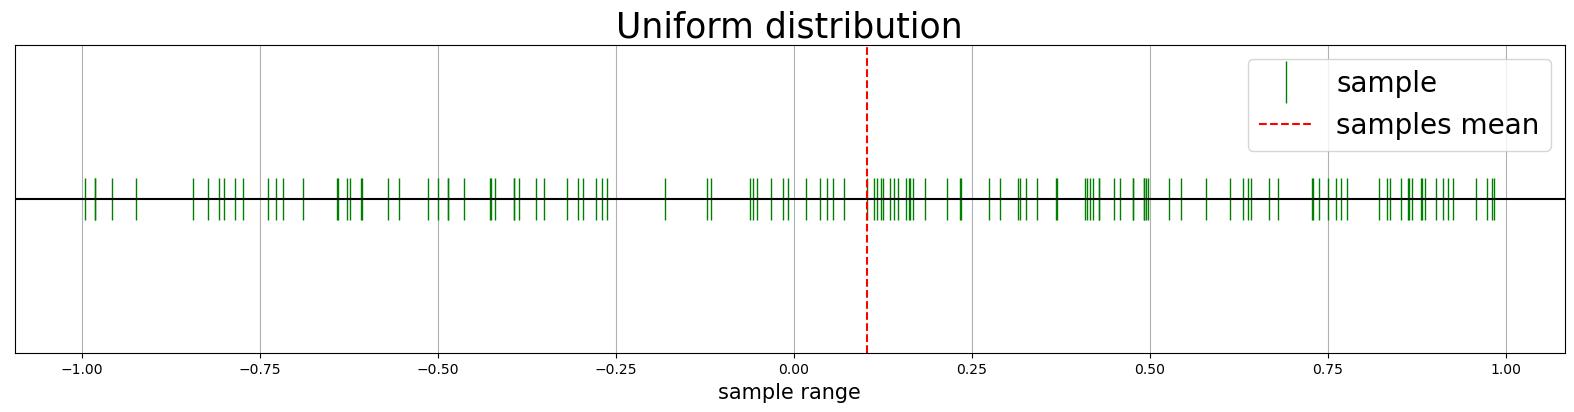

In [9]:
vis_1d_samples(U, title='Uniform distribution')

## $$\textbf{ Represent samples using a bar plot}$$
<hr>
<br>

In [12]:
counts, ranges = np.histogram(U, bins=5)
print(counts, ranges)

begins = ranges[:-1]
ends = ranges[1:]
begins, ends

[21 21 27 28 31] [-0.99562991 -0.59967591 -0.20372191  0.1922321   0.5881861   0.9841401 ]


(array([-0.99562991, -0.59967591, -0.20372191,  0.1922321 ,  0.5881861 ]),
 array([-0.59967591, -0.20372191,  0.1922321 ,  0.5881861 ,  0.9841401 ]))

[-0.79765291 -0.40169891 -0.00574491  0.3902091   0.7861631 ]
[-0.798 -0.402 -0.006  0.39   0.786]


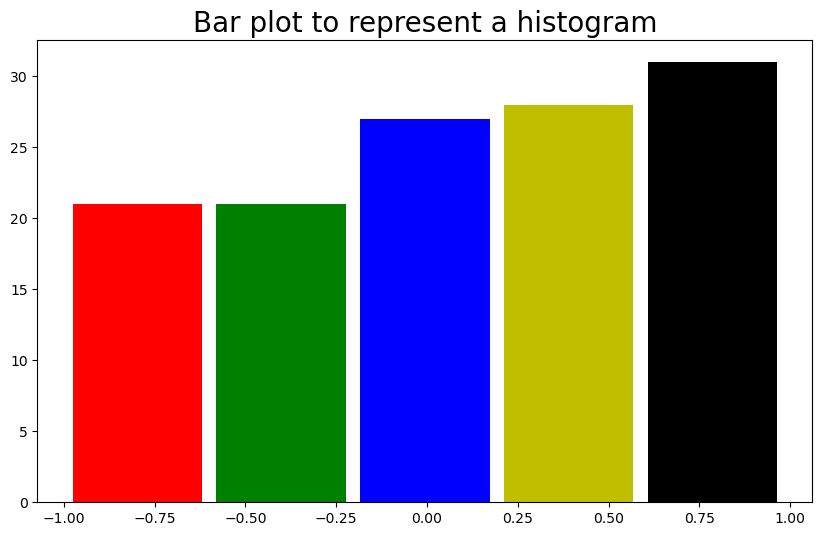

In [16]:
bar_widths = ends - begins
width = np.max(bar_widths)
centers = begins + 0.5 * bar_widths

print(centers)
np.set_printoptions(precision=3, suppress=True)
print(centers)

ax = plt.figure(figsize=(10, 6)).gca()
ax.set_title('Bar plot to represent a histogram', fontsize=20)

rwidth = 0.9
plt.bar(centers, counts, width=rwidth*width, color=['r', 'g', 'b', 'y', 'k']);

In [15]:
reset_printoptions = lambda : np.set_printoptions(edgeitems=3, infstr='inf', linewidth=75, nanstr='nan', precision=8,
suppress=False, threshold=1000, formatter=None)

reset_printoptions()

## $$\textbf{ Represent samples using a histogram plot}$$
<hr>
<br>

(array([0.474, 0.118, 0.474, 0.355, 0.355, 0.71 , 0.237, 0.474, 0.474,
        0.592, 0.474, 0.237, 0.118, 0.237, 0.71 , 0.474, 0.71 , 0.947,
        0.355, 0.474, 0.474, 0.829, 0.829, 0.355, 0.474, 0.237, 0.829,
        0.355, 1.065, 0.71 ]),
 array([-0.996, -0.93 , -0.864, -0.798, -0.732, -0.666, -0.6  , -0.534,
        -0.468, -0.402, -0.336, -0.27 , -0.204, -0.138, -0.072, -0.006,
         0.06 ,  0.126,  0.192,  0.258,  0.324,  0.39 ,  0.456,  0.522,
         0.588,  0.654,  0.72 ,  0.786,  0.852,  0.918,  0.984]))

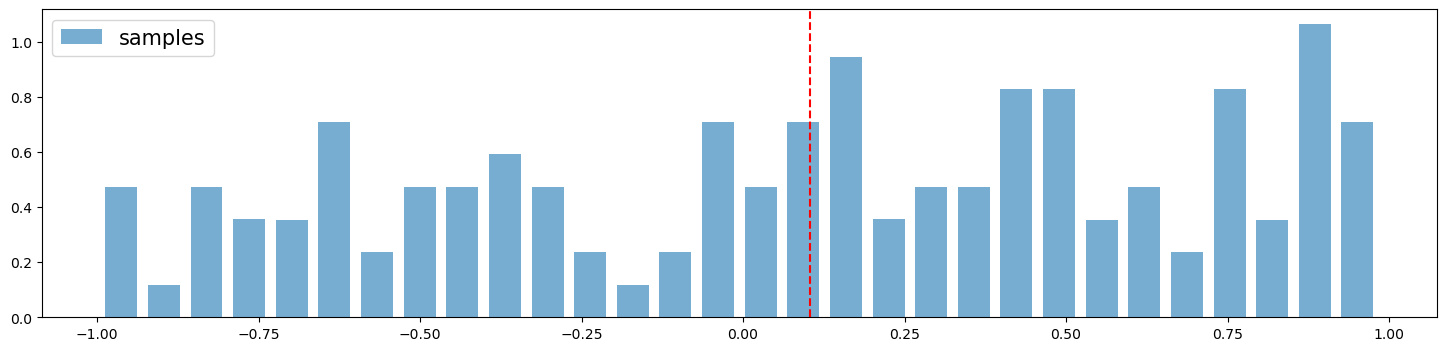

In [18]:
plt.figure(figsize=(18, 4))

# num of bins, block width percentage
nums, ranges, _ = plt.hist(U, bins=30, rwidth=3/4, alpha=0.6, label='samples', density=True) 

plt.axvline(x=U.mean(), ls='--', c='r') # plot dashed mean line
plt.legend(fontsize=15);

nums, ranges

In [19]:
def calc_area(nums, ranges):
    vals = ranges[1:] - ranges[:-1]
    area = np.sum(vals * nums)
    return area

calc_area(nums, ranges) # let the integral be numerically close to 1

1.0

## $$\textbf{Univariate-normal (Gaussian) distribution}$$
<hr>
<br>

In [26]:
def sample_normal(mean, std, n_samples=1000, seed=None):
    
    if seed is not None:
        # fixes the random number generator to a seed for debuging
        rnd.seed(seed)
        
    X = rnd.normal(loc=mean, scale=std, size=n_samples)
    print(f'Mean: {X.mean():.3f} Variance: {X.var():.2f} Std: {X.std():.2f}')
    
    return X

In [30]:
mean = 2
std = 8

X = sample_normal(mean, std, seed=42)

Mean: 2.155 Variance: 61.31 Std: 7.83


## $$\textbf{ Gaussian distribution plot}$$
<hr>
<br>

Mean: 2.006 Variance: 60.73 Std: 7.79


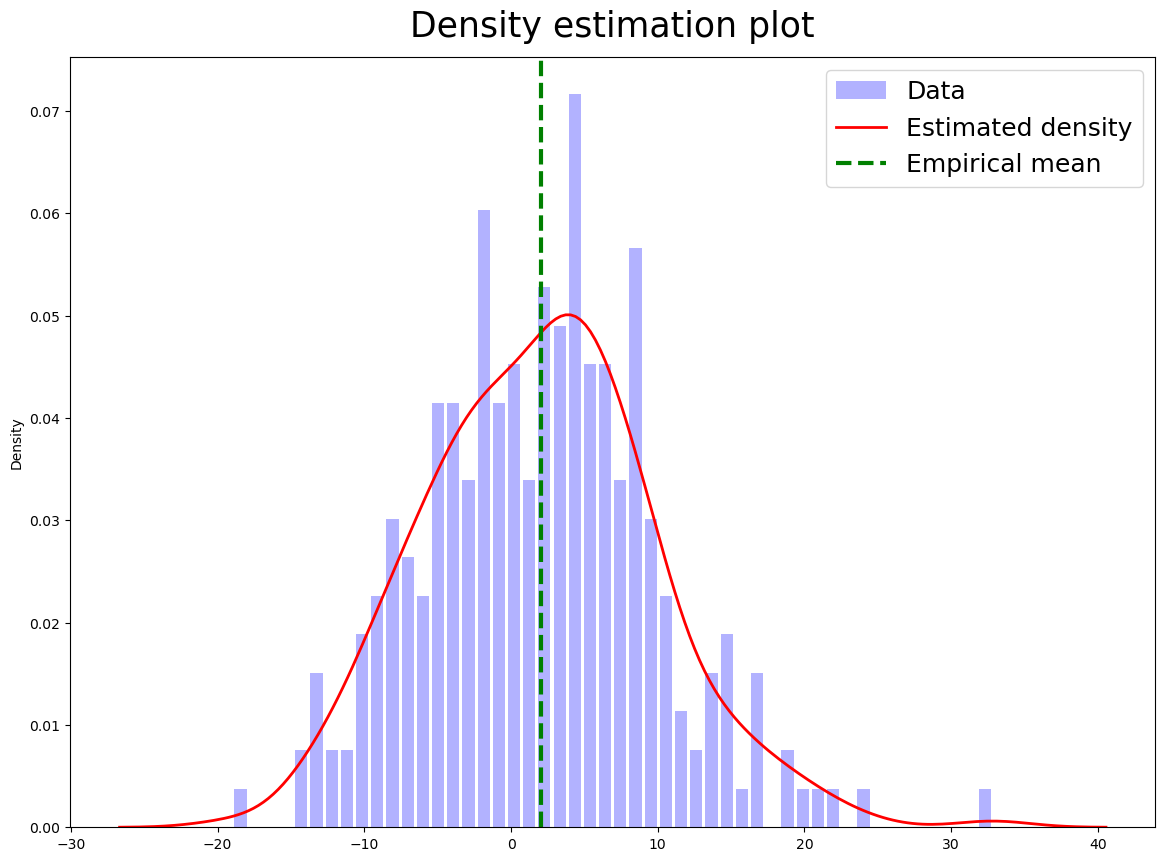

In [35]:
X = sample_normal(mean, std, n_samples=256, seed=42)

ax = plt.figure(figsize=(14, 10)).gca()

nums, borders, _ = ax.hist(X, bins=50, density=True, alpha=0.3, rwidth=0.8, color='b', label='Data')
assert np.isclose(calc_area(nums, borders), 1) # because of the density=True

#conda install -c anaconda seaborn
from seaborn import kdeplot

kdeplot(X, linewidth=2, color='r', label='Estimated density')
ax.axvline(X.mean(), ls='--', c='g', label='Empirical mean', linewidth=3)

ax.set_title('Density estimation plot', fontsize=25, pad=15) # Title's vertical padding 15px
ax.legend(loc='best', fontsize=18);


## $$\textbf{Mixture of Gaussian distributions}$$
<hr>
<br>

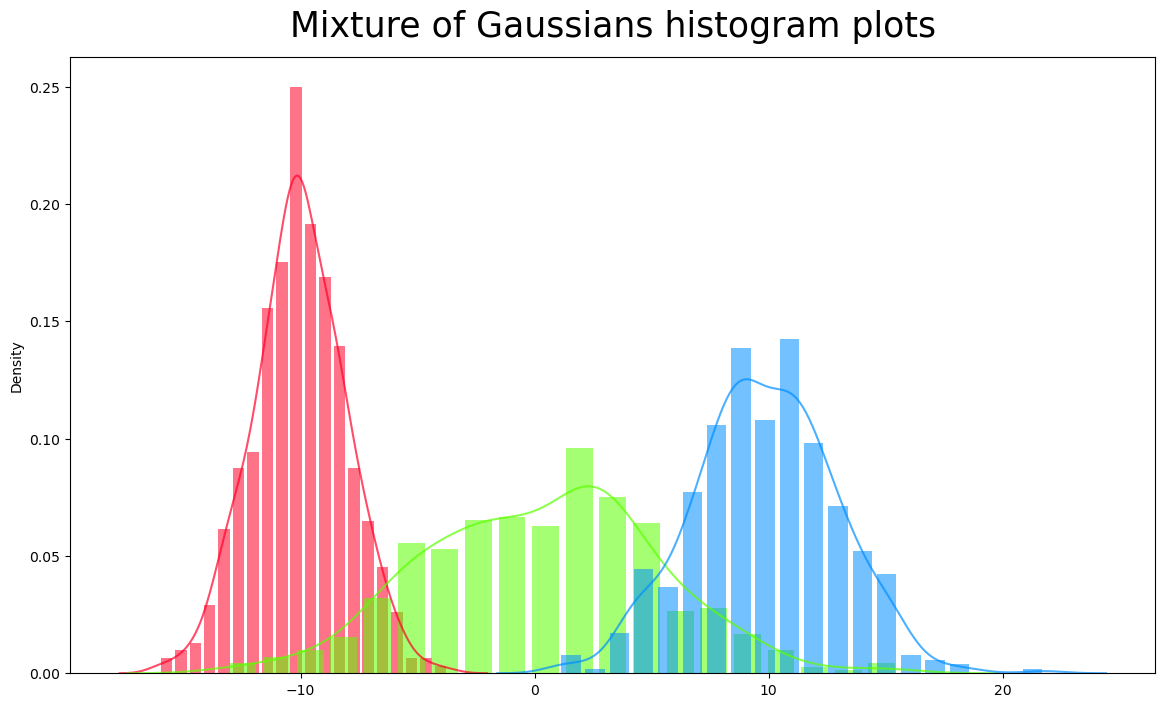

In [37]:
means = [-10, 0, 10]
stds = [2, 5, 3]

assert len(means) == len(stds)

n_clusters = len(means)

ax = plt.figure(figsize=(14, 8)).gca()

from matplotlib import cm
cmap = cm.get_cmap('gist_rainbow')
rgba_values = cmap(np.arange(n_clusters) / n_clusters) # red, green, blue, alpha

for n in range(n_clusters):
    
    data = rnd.normal(means[n], stds[n], size=500)  
    color = rgba_values[n]
    
    ax.hist(data, bins=20, color=color, alpha=0.55, rwidth=0.8, density=True)
    kdeplot(data, color=color, alpha=0.7)
    
ax.set_title('Mixture of Gaussians histogram plots', fontsize=25, pad=15);   

### $$\textbf{Gaussian histogram plot with subplots}$$
<hr>

In [39]:
def plot_gaussians(means, stds, size=250, bins=25):
    
    N = len(means)
    M = len(stds)
    
    fig, axis = plt.subplots(nrows=N, ncols=M, sharey=True, sharex=True, figsize=(24, 16))

    R,C = axis.shape

    for r in range(R):
        for c in range(C):
            
            ax = axis[r,c]
            
            data = rnd.normal(means[r], stds[c], size=size)
            
            ax.hist(data, bins=bins, rwidth=0.8, density=True, color='g', alpha=0.5, label='data')
            ax.axvline(data.mean(), ls='--', c='r', ymax=.8, label='$\\mu =$'+f'{data.mean():0.2f} std: {data.std():0.2f}')
            
            ax.set_xticks(means) # plt.xticks([...])
            ax.legend(fontsize=15)
            ax.grid(axis='y')
            
            ax.set_title(f'{r}_{c}')     
            kdeplot(data, ax=ax, color='k')
            
    fig.suptitle('Gaussian histogram plots', fontsize=25)

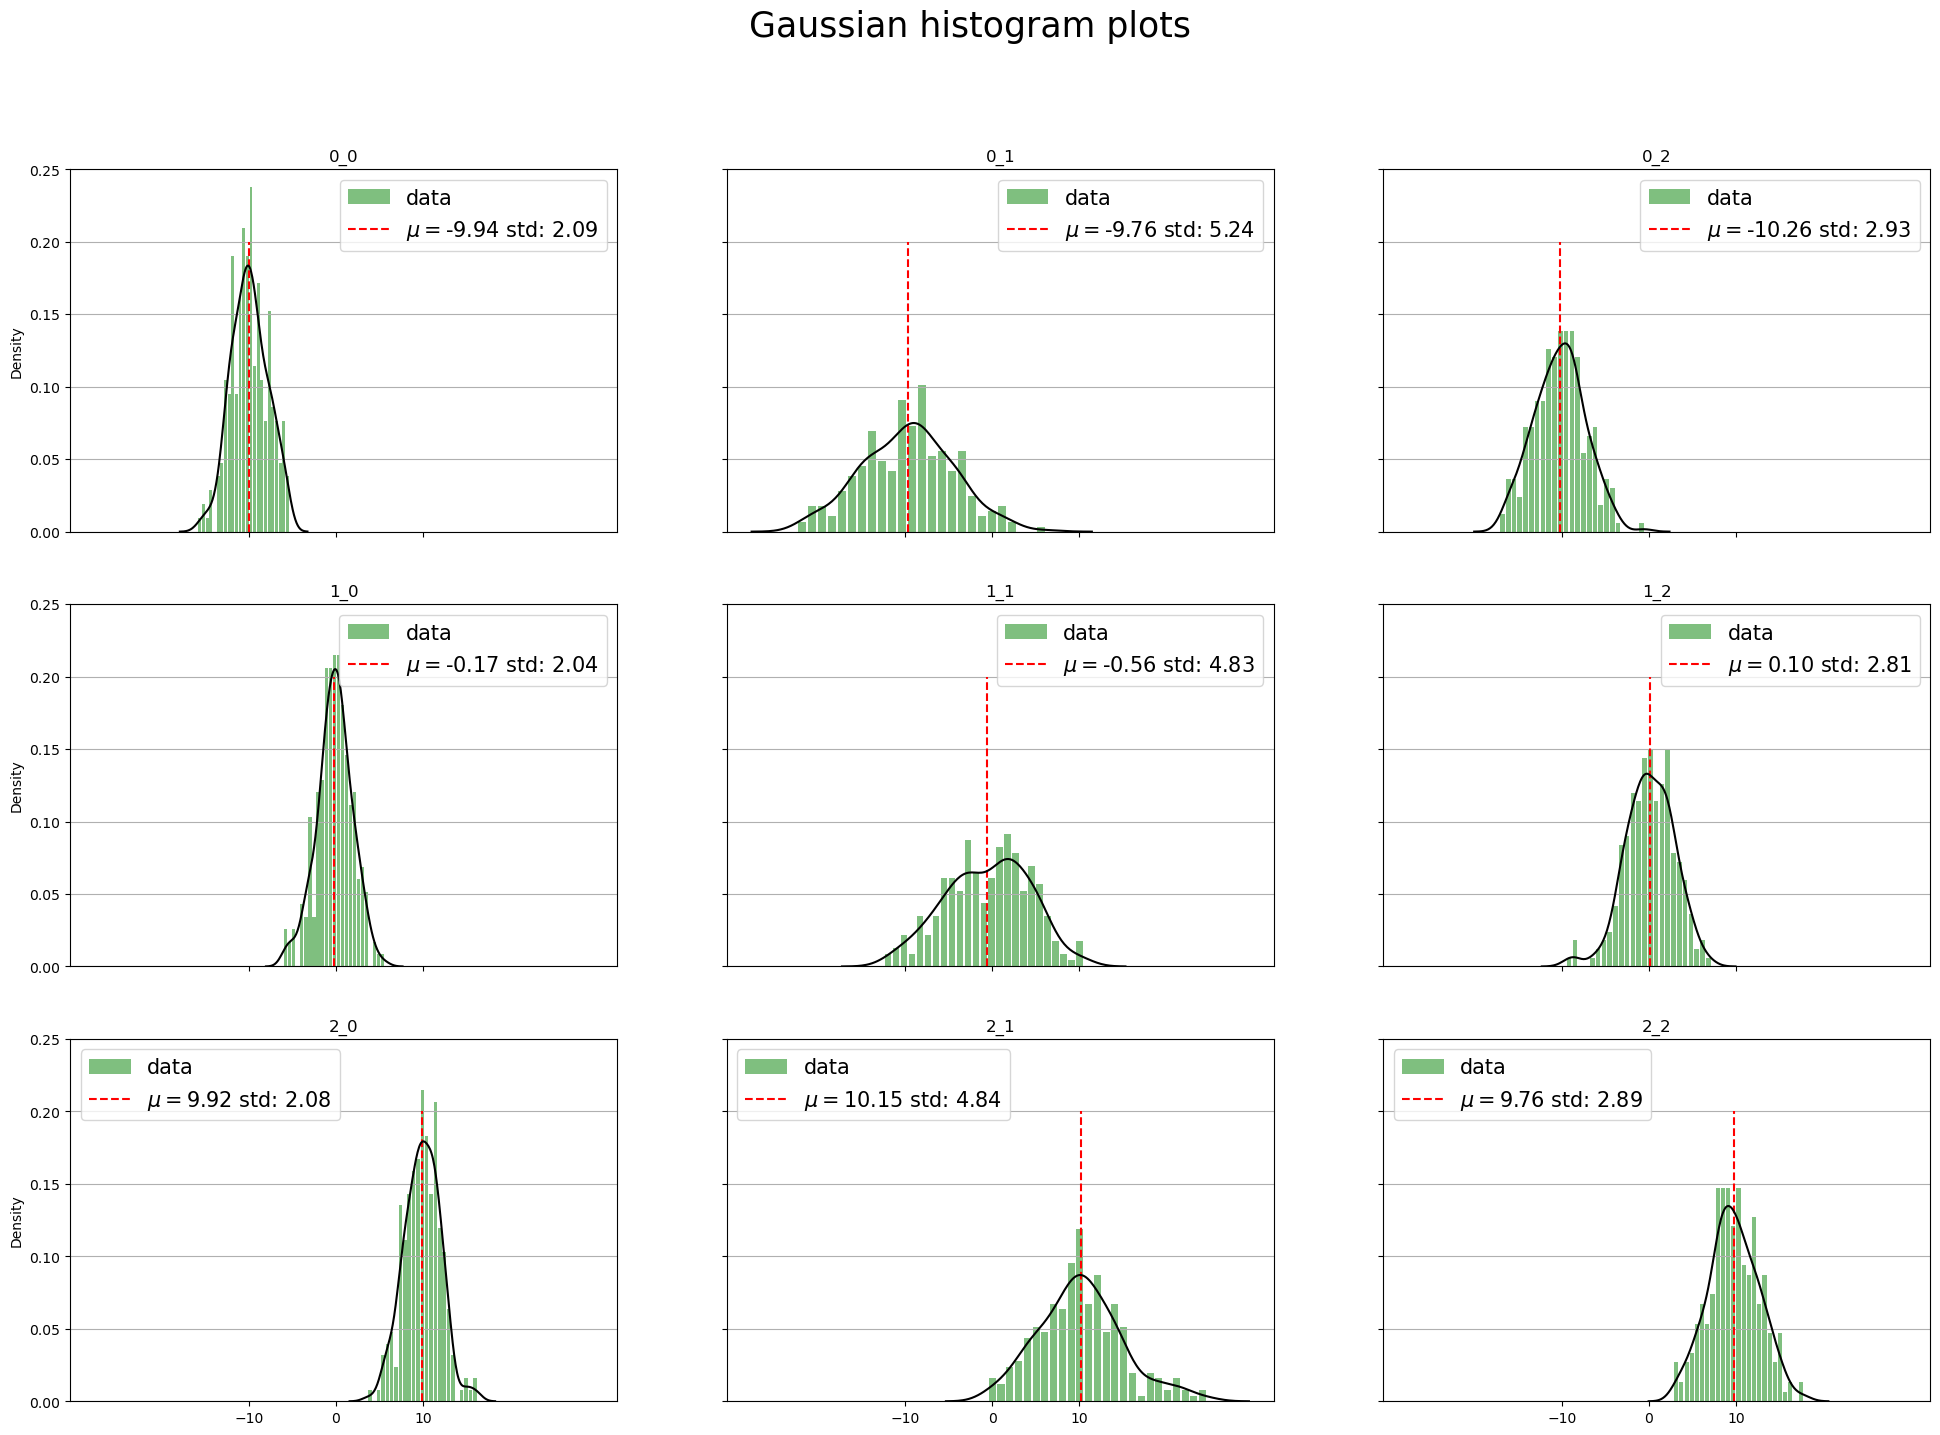

In [40]:
plot_gaussians(means, stds)

## $$\textbf{Probability density function}$$
<hr>

* $\text{Gaussian PDF}$

$$\boxed{\small{\mathcal{N}(x | \mu, \sigma)} = 
\frac{1}{\sigma\sqrt{2\pi}}\exp{\Big(-\frac{(x - \mu)^2}{2\sigma^2}\Big)}}$$

In [42]:
def gauss_pdf(X, mu=0, sigma=1):
    #                                           (N,) - (1,) = (N,d)
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(X - mu)**2/(2*sigma**2))

In [43]:
mean = 2
std = 4

X = np.linspace(start=-15, stop=18, num=100)
print(X[::10])

g_pdf = gauss_pdf(X, mean, std)

[-15.    -11.667  -8.333  -5.     -1.667   1.667   5.      8.333  11.667
  15.   ]


In [44]:
from scipy.stats import norm

n_pdf = norm.pdf(X, loc=mean, scale=std)

assert np.allclose(g_pdf, n_pdf), 'The pdf values are not the same'

## $$\textbf{Univariate Gaussian PDF}$$
<hr>
<br>


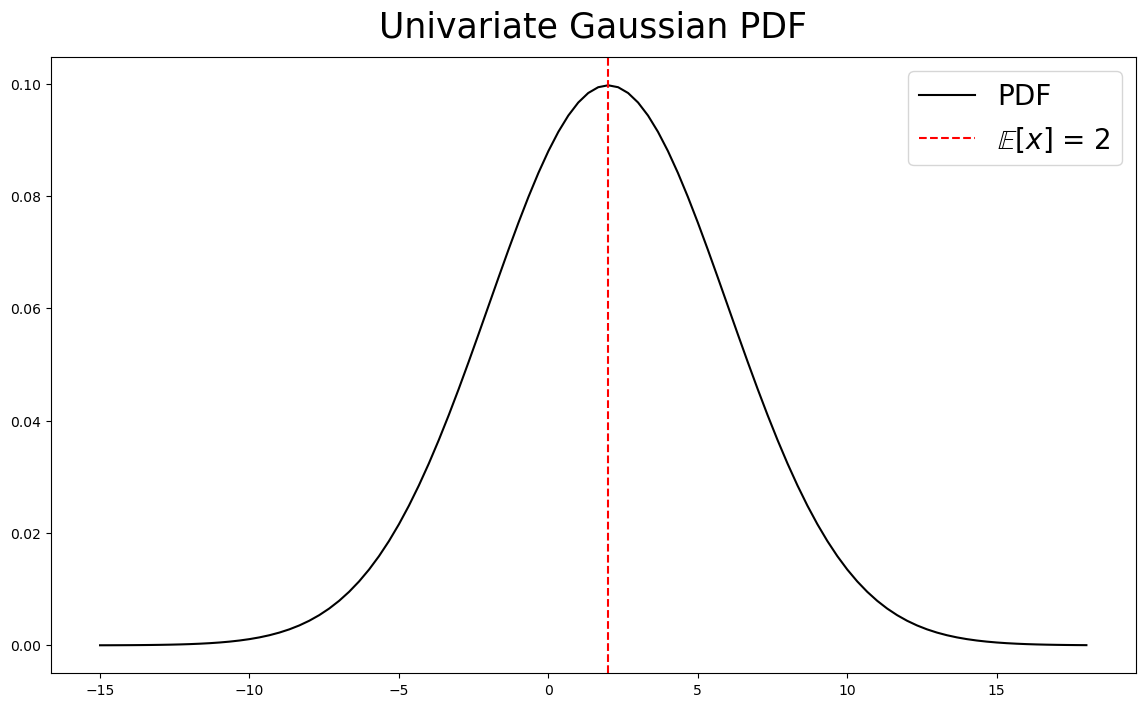

In [46]:
ax = plt.figure(figsize=(14, 8)).gca()
ax.set_title('Univariate Gaussian PDF', fontsize=25, pad=15)

ax.plot(X, g_pdf, color='k', label='PDF')
ax.axvline(mean, color='r', linestyle='--', label='$\mathbb{E}[x]$' + f' = {mean}')
ax.legend(fontsize=20);

## $$\textbf{Multivariate Gaussian distribution}$$
<hr>

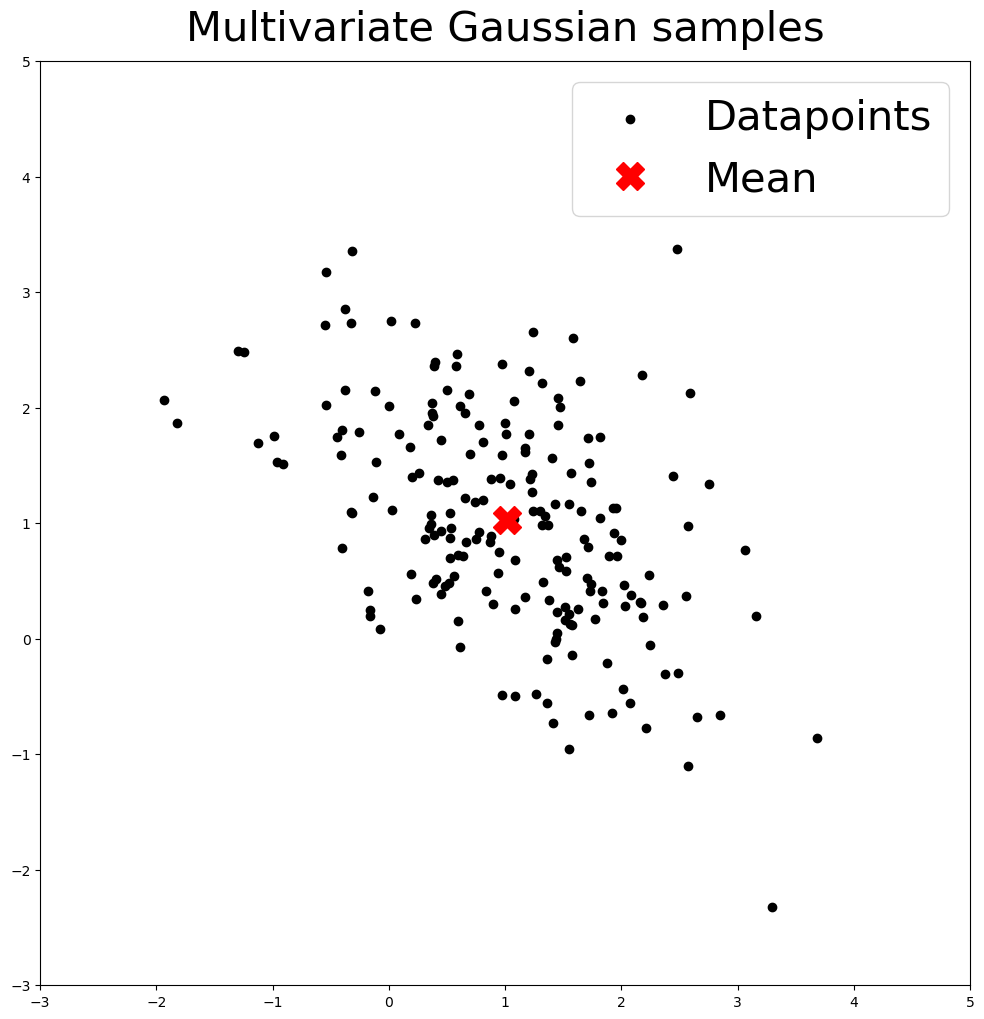

In [50]:
from scipy.stats import multivariate_normal

mu = np.ones(2) # [1, 1]
Sigma =  np.array([[1, -0.5],[-0.5, 1]]) # use np.eye(d) for Identity matrix

xmin, xmax, ymin, ymax = [-3, 5, -3, 5]

X = multivariate_normal.rvs(mean=mu, cov=Sigma, size=200, random_state=42) # get random samples

ax = plt.figure(figsize=(12, 12)).gca()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_title('Multivariate Gaussian samples', fontsize=30, pad=15)
ax.scatter(*X.T, color='k', label='Datapoints')
ax.plot(*X.mean(0), 'X', color='r', ms=20, label='Mean')
ax.legend(loc='best', fontsize=30);

## $$\textbf{Multivariate Gaussian density plot}$$
<hr>

(800, 800) (800, 800)
(800, 800, 2)


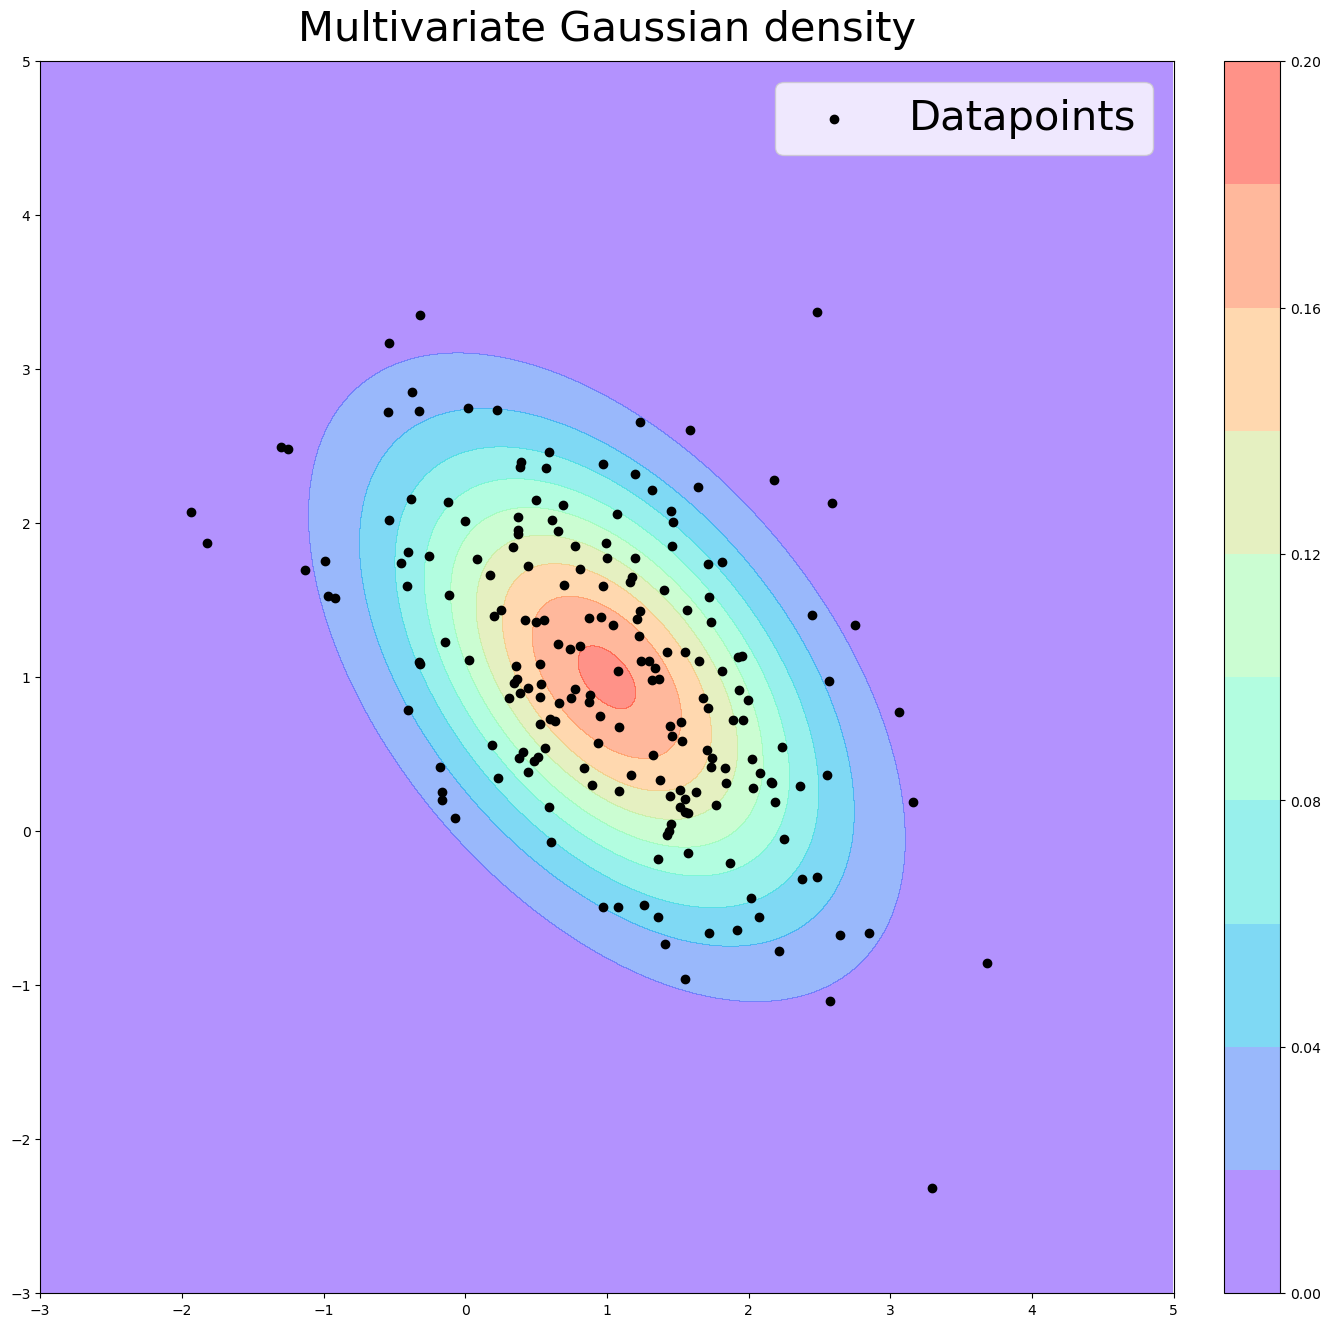

In [51]:
x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
print(x.shape, y.shape)

xy = np.dstack([x, y]) # Stack arrays in sequence depth wise (along third axis).
#xy = np.r_[x[:, :, None], y[:, :,None]] # equiv

print(xy.shape)

z = multivariate_normal(mu, Sigma).pdf(xy) # calc MVG pdf values

fig = plt.figure(figsize=(16, 16))
ax = fig.gca()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cntr = ax.contourf(x, y, z, cmap='rainbow', alpha=0.5, levels=10)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)

fig.colorbar(cntr, cax=cax, orientation='vertical')
ax.set_title('Multivariate Gaussian density', fontsize=30, pad=15)
ax.scatter(*X.T, color='k', label='Datapoints')
ax.legend(loc='best', fontsize=30);

## $$\textbf{Multinomial distribution}$$
<hr>

* $\text{Let's draw some random samples from a multinomial distribution. We'll use our fruits from the first lecture.}$
<br>
<br>
<center>
    <img src='./images/fruits.png', width='1400'>

In [52]:
fruits = np.array([
    'watermelon',
    'apple',
    'grape',
    'grapefruit',
    'lemon',
    'banana',
    'cherry'
])

## $$\textbf{Sample from multinomial}$$
<hr>

In [53]:
n = 5 # number of samples

p = np.ones(len(fruits))/len(fruits) # represents equal sampling probability

print(f"Sampling probabilities: {p}\n")

all_fruits = np.tile(fruits, (n,1)) # repeat multiple (5) times to represent all possible picks
print(f"All fruits basket: \n{all_fruits}" )
print(50 * '--')

Sampling probabilities: [0.143 0.143 0.143 0.143 0.143 0.143 0.143]

All fruits basket: 
[['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']]
----------------------------------------------------------------------------------------------------


In [59]:
rnd.seed(42)

mlt = rnd.multinomial(1, p, size=(n)) # draw multinomial samples 5 times with the given sampling probabilities
print(f"Sampling outcome: \n{mlt}")

mask = mlt.astype(bool)
print(50 * '--')
print(f"Random selection mask: \n{mask}" )

samples = all_fruits[mask] # select drown samples from all fruits
print(50 * '--')
print(f"Drown samples: {samples}")

Sampling outcome: 
[[0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]
----------------------------------------------------------------------------------------------------
Random selection mask: 
[[False  True False False False False False]
 [False False False False False  True False]
 [False False False  True False False False]
 [False False False False False  True False]
 [False False False False False False  True]]
----------------------------------------------------------------------------------------------------
Drown samples: ['apple' 'banana' 'grapefruit' 'banana' 'cherry']


In [58]:
print(f"Empirical estimation of sampling probabilities: {mask.mean(axis=0)}")

Empirical estimation of sampling probabilities: [0.  0.2 0.  0.2 0.  0.4 0.2]


## $$\textbf{Adjust selection probabilities}$$
<hr>

In [62]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05] # new probailities to pick a fruit
assert np.isclose(np.sum(p), 1)

n = 10

all_fruits = np.tile(fruits, (n, 1))

mlt = rnd.multinomial(1, p, size=n) # draw multinomial samples 5 times with given probabilities
print(mlt.shape) # mask as 0 or 1 ints

samples = all_fruits[mlt.astype(bool)] # show drown samples
print(samples)

# Closer estimation because of the higher number of samples e.g. n = 10_000
mlt.mean(axis=0) 

(10, 7)
['apple' 'apple' 'apple' 'apple' 'apple' 'grapefruit' 'apple' 'apple'
 'apple' 'apple']


array([0. , 0.9, 0. , 0.1, 0. , 0. , 0. ])

## $$\textbf{ Another way to make discrete choices}$$
<hr>

<center>
    <img src='./images/sampling.png', width='900'>

In [73]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05]

temp = [0] + p[:-1]
print(temp)

# Cumulate them
l = np.cumsum(temp) # lower-bounds
h = np.cumsum(p)    # upper-bounds

print(f'Lower: {l} and upper: {h} bounds')

# Draw uniformly a number between 0 and 1
u = np.random.uniform(0, 1)

# Find which bin it belongs to
s = np.logical_and(u >= l, u < h)  # *

print(s) # sampled bin as a mask

# get the label
fruits[np.argmax(s)]

[0, 0.05, 0.7, 0.05, 0.05, 0.05, 0.05]
Lower: [0.   0.05 0.75 0.8  0.85 0.9  0.95] and upper: [0.05 0.75 0.8  0.85 0.9  0.95 1.  ] bounds
[False False  True False False False False]


'grape'

# $$\textbf{ Optimization}$$
<hr>
<br>
<br>

<center>
    <img src='./images/optim.png' width='700'>

# $$\textbf{ Automatic differentiation with JAX}$$
<hr> 

<center>
    <img src='./images/JAX.png' width='400'>

In [63]:
#conda install -c conda-forge jax

import jax.numpy as np 
from jax import grad

## $$\textbf{ Taking univariate function derivatives}$$
<hr> 


$$y = 3 x^2 + 2, \quad y^{'}_{x} = 6x, \quad y^{''}_{x} = 6$$

In [64]:
# define a function to numerically comp a gradient for
import jax.numpy as np

def y(x):
    return 3 * np.square(x) + 2 # note that you are using jax numpy

# grad comp at the point
x0 = 10.   # has to be float no diff possible on integers

# first derivative
print(grad(y)(x0)) # evaluated at point x

# second
print(grad(grad(y))(x0))


60.0
6.0


## $$\textbf{ Multivariate function derivatives}$$
<hr> 
<br>
<center>
$y = 3 x_1^3 + 2^{x_2}, \quad \frac{\partial y}{\partial x_1} = 9 x_1^2  \quad  \frac{ \partial y}{\partial x_2} = 2^{x_2} \ln{2}$

In [65]:
x1 = 2. # has to be a float number
x2 = 3. # has to be a float number

y = lambda x1, x2 : 3 * np.power(x1, 3) + np.power(2, x2) # note you are using jax numpy


In [66]:
# wrt x_1 (first func arg)
val = grad(y, 0)(x1, x2) # 9 * 2**2 = 36.

test_val = 9*x1**2
print(f'{val} == {test_val}')

assert np.isclose(val,test_val)

36.0 == 36.0


In [67]:
# wrt x_2
val = grad(y, 1)(x1, x2) # 2**(3)*ln(2)

test_val = 2**x2 * np.log(2)
print(f'{val} == {test_val}')

assert np.isclose(val, test_val, atol=1e-3) # 0.001 10**-3

5.545177459716797 == 5.545177459716797


* $\text{For more info about}\>$ <a href='https://jax.readthedocs.io/en/latest/notebooks/quickstart.html'>JAX</a>



## $$\textbf{ Gradient descent for finding minimum of a function}$$
<hr> 
<br>
$$y = kx^2 + const, \quad k=3$$

In [68]:
# a function to find a minimum numerically
import jax.numpy as np 

f = lambda x, coeff=3, offset=0: coeff * np.power(x, 2) + offset # jax numpy !

def minimize_(fn, x0, step_size, max_it): 

    vals = np.array([x0]).astype(np.float32) # list of the checked points

    for _ in range(max_it):
        
        grad_f = grad(fn)
        
        curr_val = vals[-1]
        if abs(grad_f(curr_val)) > 1e-5: # the derivative approx not zero
            
            next_val = curr_val - step_size*grad_f(curr_val)
            vals = np.append(vals, next_val)
            
        else:
            return vals
            
    return vals

In [69]:
vals = minimize_(f, x0=-5., step_size=0.1, max_it=10)
vals

DeviceArray([-5.   , -2.   , -0.8  , -0.32 , -0.128, -0.051, -0.02 ,
             -0.008, -0.003, -0.001, -0.001], dtype=float32)

## $$\textbf{ Plot the optimization steps}$$
<hr> 

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_minimize(x, f, max_it=10, step_size=0.01):
    
    plt.figure(figsize=(10, 8))      
    plt.plot(x, f(x), label='$f(x)$')
    
    vals = minimize_(f, x0=x[0], step_size=step_size, max_it=max_it)
    
    plt.plot(vals, f(vals), "o--", c="r", label='opt step')  
    plt.legend(loc='best', fontsize=20)
    plt.grid()

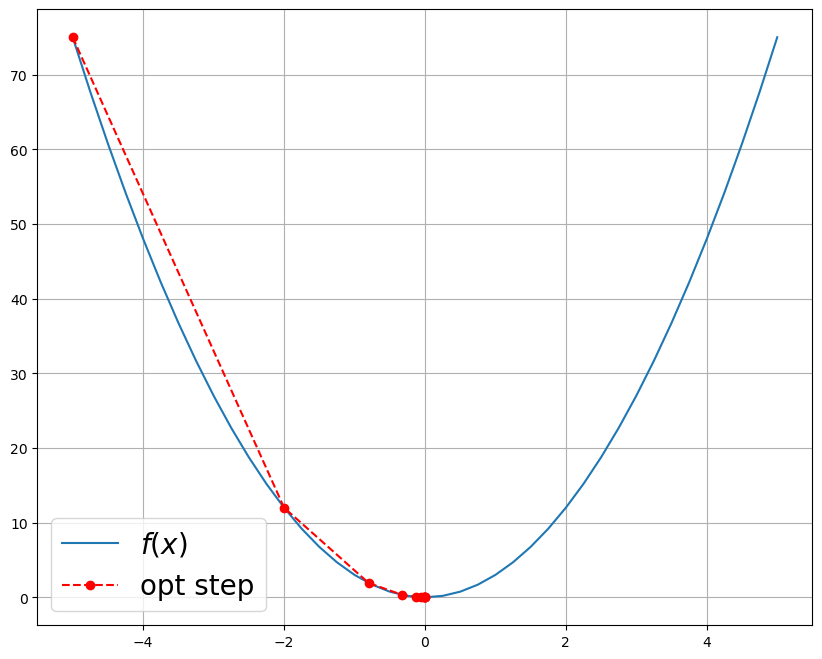

In [71]:
x = np.arange(-5, 5.01, 0.25) # function range
plot_minimize(x, f, max_it=10, step_size=0.1)


## $$\textbf{SciPy minimize function}$$
<hr> 

<center>
    <img src='./images/scipy.png' width='300'>

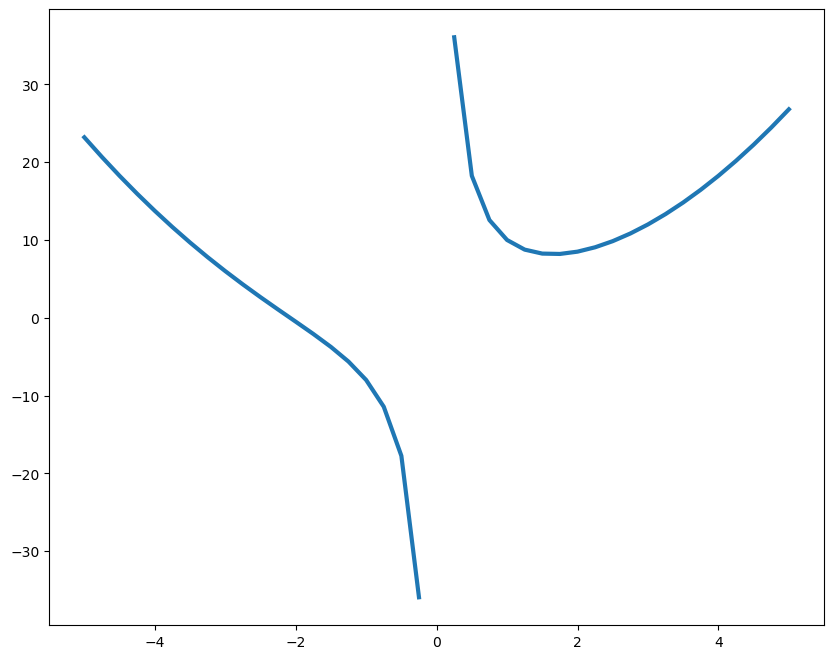

In [72]:
# Non continous function
f = lambda x, coeff=3, power=2: coeff * np.divide(coeff, x) + x ** power

x = np.arange(-5, 5.01, 0.25)
plt.figure(figsize=(10, 8))
plt.plot(x, f(x), linewidth=3)
plt.show()

## $$\textbf{Optimize non continuous functions}$$
<hr> 

In [73]:
#conda install -c anaconda scipy

from scipy.optimize import minimize
import numpy as np

# use constrained optimization with bounds
min_x, max_x = (0.01, np.inf)

res = minimize(f, 5, args=(3, 2), method='L-BFGS-B', bounds=((min_x, max_x),) ) 
# result dict object
res

      fun: array([8.177])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 24
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([1.651])

# $$\textbf{Local minimum}$$
<hr> 


/tmp/ipykernel_346262/376613714.py:2: RuntimeWarning: divide by zero encountered in true_divide
  f = lambda x, coeff=3, power=2: coeff * np.divide(coeff, x) + x ** power


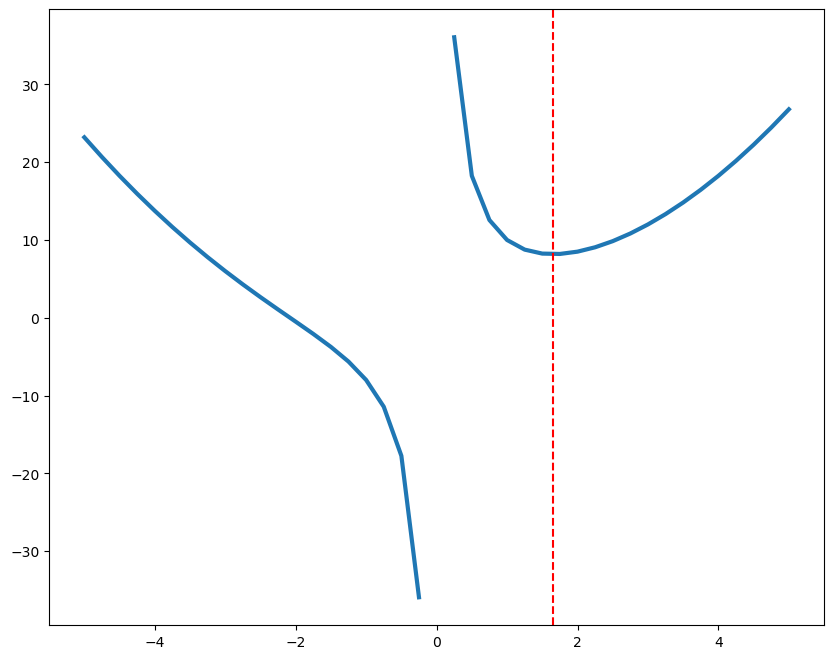

In [74]:
plt.figure(figsize=(10, 8))
plt.plot(x, f(x), linewidth=3)
plt.axvline(res['x'], linestyle='--', c='r')
plt.show()

# $$\textbf{Numerical integration with SciPy}$$
<hr> 


In [75]:
f = lambda x, mu, sigma : np.exp(-0.5*(x-mu)**2/sigma**2)

mu = 1; sigma = 2;
args = (mu, sigma)

x = np.arange(-10, 12, 0.1)

def plot_(x, f, args, I=1):
    plt.figure(figsize=(8, 6))
    plt.plot(x, f(x, *args)/I, linewidth=3)
    plt.show()

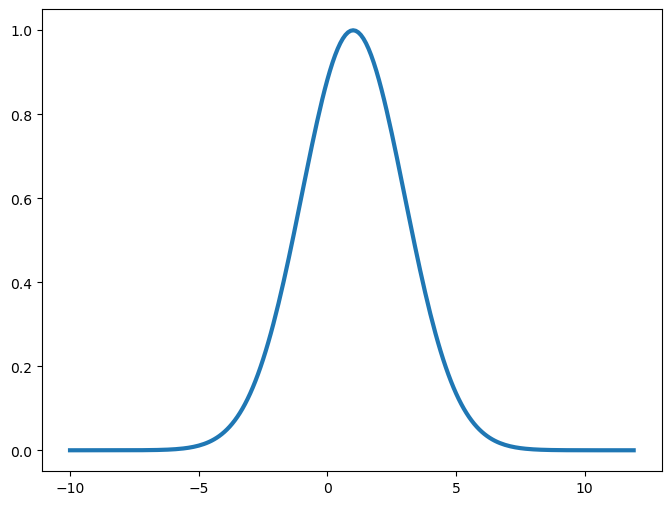

In [76]:
plot_(x, f, args)

# $$\textbf{Numerical integration}$$
<hr>

$$\Large{
I = \int_a^b f(x)\ dx
}$$

In [77]:
from scipy.integrate import quad as integral

a = -10; b = 12;
I, err = integral(f, a, b, args)

print(f'An estimate of the absolute error in the result: {err}')
I

An estimate of the absolute error in the result: 1.658173531815521e-08


5.013256358862905

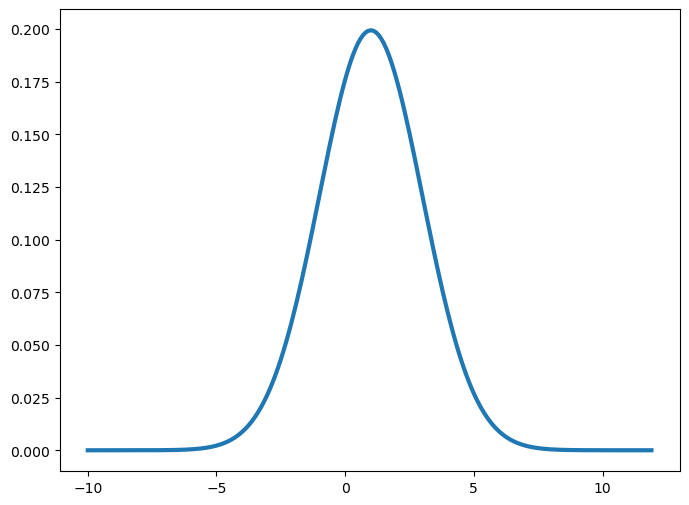

In [78]:
plot_(x, f, args, I)

## $$\textbf{Thank you for your attention.}$$